In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df =pd.read_csv("../data/UN_data_exploration.csv")

In [3]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [4]:
gdp_df=gdp_df.drop('Value Footnotes', axis=1)

In [5]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [6]:
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Value": "GDP_Per_Capita"})
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

**6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.**

In [7]:
gdp_df.shape

(7176, 3)

In [8]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [9]:
gdp_df['Country'] = gdp_df['Country'].astype('string')

In [10]:
gdp_df.dtypes

Country            string
Year                int64
GDP_Per_Capita    float64
dtype: object

**7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?**

In [11]:
years = gdp_df['Year'].unique()

In [12]:
#Make a list of lists 
years_obs = []
for year in years:
    years_obs.append([year, len(gdp_df[gdp_df['Year']==year])])
#Convert this list of lists into a data frame
years_obs_df = pd.DataFrame(years_obs, columns =['Years','Observations'])

In [13]:
years_obs_df.head()

,Years,Observations
0,2020,240
1,2019,241
2,2018,242
3,2017,242
4,2016,242


In [14]:
years_obs_df["Observations"].describe()

count     31.000000
mean     231.483871
std       11.899218
min      206.000000
25%      226.000000
50%      236.000000
75%      240.000000
max      242.000000
Name: Observations, dtype: float64

**8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?**

In [15]:
number_of_countries = gdp_df["Country"].nunique()

In [16]:
number_of_countries

242

In [17]:
countries = gdp_df["Country"].unique()

In [18]:
countries_obs = []
for country in countries:
    countries_obs.append([country, len(gdp_df[gdp_df["Country"]== country])])
countries_obs
countries_obs_df = pd.DataFrame(countries_obs, columns =['Countries','Observations'])

In [19]:
countries_obs_df.sort_values(by=["Observations"])

,Countries,Observations
198,Somalia,8
53,Djibouti,8
226,Turks and Caicos Islands,10
193,Sint Maarten (Dutch part),10
112,Kosovo,13
...,...,...
107,Jordan,31
108,Kazakhstan,31
109,Kenya,31
137,Malta,31


**9. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.**

In [22]:
gdp_2014 = gdp_df[gdp_df["Year"]==2014]
gdp_2014

,Country,Year,GDP_Per_Capita
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472
...,...,...,...
7031,Vietnam,2014,7601.858491
7062,West Bank and Gaza,2014,5967.073437
7089,World,2014,15224.439424
7120,Zambia,2014,3450.037600


**10. Use describe() to find the summary statistics for GDP per capita in 2014.**

In [23]:
gdp_2014["GDP_Per_Capita"].describe()

count       242.000000
mean      19612.875611
std       20961.714572
min         822.611195
25%        4702.212961
50%       12178.874687
75%       26461.384188
max      155201.740571
Name: GDP_Per_Capita, dtype: float64

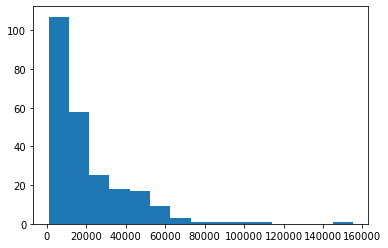

In [26]:
plt.hist(gdp_2014["GDP_Per_Capita"], bins=15)
plt.show()

**12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2018.**

In [30]:
gdp_2018 = gdp_df[gdp_df["Year"]==2018]
gdp_2018.sort_values(by="GDP_Per_Capita").iloc[:5]

,Country,Year,GDP_Per_Capita
916,Burundi,2018,761.524143
1138,Central African Republic,2018,933.109951
1526,Dem. Rep. Congo,2018,1085.893688
5873,Somalia,2018,1129.531464
4752,Niger,2018,1200.402348


In [31]:
gdp_2018.sort_values(by="GDP_Per_Capita").iloc[-5:]

,Country,Year,GDP_Per_Capita
3073,Ireland,2018,83726.362961
5383,Qatar,2018,90970.060902
5722,Singapore,2018,98336.956494
3884,Luxembourg,2018,115049.926079
3915,"Macao SAR, China",2018,132373.544079


**13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2018 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2018. Save the result to a dataframe named gdp_pivoted.**

In [33]:
pivot_data = gdp_df[gdp_df["Year"].isin([1990,2018])]

In [34]:
pivot_data.head()

,Country,Year,GDP_Per_Capita
2,Afghanistan,2018,2033.804389
21,Africa Eastern and Southern,2018,3697.317275
49,Africa Eastern and Southern,1990,3083.976800
52,Africa Western and Central,2018,4132.592996
80,Africa Western and Central,1990,2810.341129


In [73]:
gdp_pivoted = pd.pivot_table(pivot_data, values='GDP_Per_Capita', index=['Country'], columns=['Year'])
gdp_pivoted = gdp_pivoted.dropna()

14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2018. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [74]:
gdp_pivoted.reset_index(inplace=True)

In [81]:
gdp_pivoted.head()

Year,Country,1990,2018
0,Africa Eastern and Southern,3083.976800,3697.317275
1,Africa Western and Central,2810.341129,4132.592996
2,Albania,4827.034551,13317.092313
3,Algeria,8746.340762,11630.679409
4,Angola,5758.950488,6982.129420


In [83]:
gdp_pivoted["Percent Change"] =100*( gdp_pivoted[2018]-gdp_pivoted[1990])/gdp_pivoted[1990]

In [84]:
gdp_pivoted.head()

Year,Country,1990,2018,Percent Change
0,Africa Eastern and Southern,3083.976800,3697.317275,19.887973
1,Africa Western and Central,2810.341129,4132.592996,47.049515
2,Albania,4827.034551,13317.092313,175.885581
3,Algeria,8746.340762,11630.679409,32.977661
4,Angola,5758.950488,6982.129420,21.239615


In [85]:
gdp_pivoted.sort_values(by="Percent Change")

Year,Country,1990,2018,Percent Change
44,Dem. Rep. Congo,1819.723315,1085.893688,-40.326440
195,United Arab Emirates,111454.055665,66968.221181,-39.914056
28,Burundi,1184.842032,761.524143,-35.727791
194,Ukraine,16428.480469,12336.926758,-24.905247
39,Congo,5068.286948,3928.427999,-22.490024
...,...,...,...,...
50,East Asia & Pacific (IDA & IBRD),2211.871578,13879.999224,527.522835
51,East Asia & Pacific (excluding high income),2186.623227,13727.535687,527.796116
131,Myanmar,564.227113,4467.858550,691.854635
36,China,1423.896348,15133.995618,962.857956


**15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2018?**

In [89]:
len(gdp_pivoted[gdp_pivoted["Percent Change"]<0])

17

**Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.**

In [99]:
gdp_pivoted.sort_values(by="Percent Change").iloc[-2:]

Year,Country,1990,2018,Percent Change
36,China,1423.896348,15133.995618,962.857956
55,Equatorial Guinea,1039.985049,20386.013868,1860.221820


In [100]:
equato_guinea=gdp_df[gdp_df["Country"]=="Equatorial Guinea"]
china = gdp_df[gdp_df["Country"]=="China"]

In [97]:
equato_guinea

,Country,Year,GDP_Per_Capita
1873,Equatorial Guinea,2020,17214.738184
1874,Equatorial Guinea,2019,18600.391775
1875,Equatorial Guinea,2018,20386.013868
1876,Equatorial Guinea,2017,22550.958161
1877,Equatorial Guinea,2016,24827.032116
1878,Equatorial Guinea,2015,28313.433159
1879,Equatorial Guinea,2014,32436.553501
1880,Equatorial Guinea,2013,33678.737836
1881,Equatorial Guinea,2012,36671.357436
1882,Equatorial Guinea,2011,35377.736492


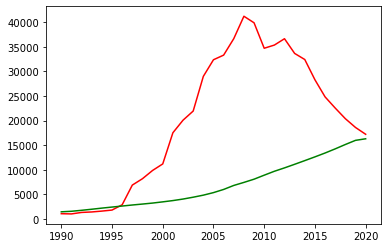

In [101]:
# plt.plot(X, y, color='r', label='sin')
# plt.plot(X, z, color='g', label='cos')
plt.plot(equato_guinea['Year'], equato_guinea['GDP_Per_Capita'], color='r', label='Eq.Guinea')
plt.plot(china['Year'], china['GDP_Per_Capita'], color='g', label='China')

**17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

19. Determine the number of countries per continent. Create a bar chart showing this.
**

In [102]:
continents = pd.read_csv('../data/continents.csv')

In [113]:
gdp_df = pd.merge(gdp_df, continents, on=["Country"])

In [118]:
continent_list = gdp_df["Continent"].unique()

In [128]:
len(gdp_df[gdp_df["Continent"]=='Africa'])
countries_in_continent =[]
for continent in continent_list:
    countries_in_continent.append([continent, len(gdp_df[gdp_df["Continent"] == continent])])
countries_in_continent_df = pd.DataFrame(countries_in_continent, columns=["Continent", "Countries"])


In [129]:
countries_in_continent_df

,Continent,Countries
0,Asia,1247
1,Europe,1316
2,Africa,1485
3,North America,783
4,South America,341
5,Oceania,410


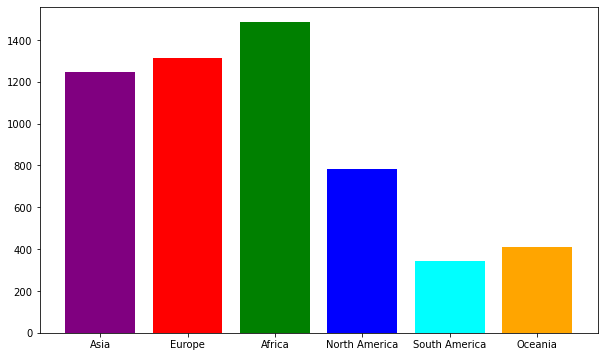

In [133]:
plt.figure(figsize=(10,6))
plt.bar(countries_in_continent_df["Continent"], countries_in_continent_df["Countries"], color=['purple', 'red', 'green', 'blue', 'cyan', 'orange'])
plt.show()

**20. Create a seaborn boxplot showing GDP per capita in 2018 split out by continent. What do you notice?**

In [136]:
gdp_2018 = gdp_df[gdp_df['Year']==2018]
gdp_2018.head()

,Country,Year,GDP_Per_Capita,Continent
2,Afghanistan,2018,2033.804389,Asia
21,Albania,2018,13317.092313,Europe
52,Algeria,2018,11630.679409,Africa
83,Angola,2018,6982.129420,Africa
114,Antigua and Barbuda,2018,21017.264500,North America


<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

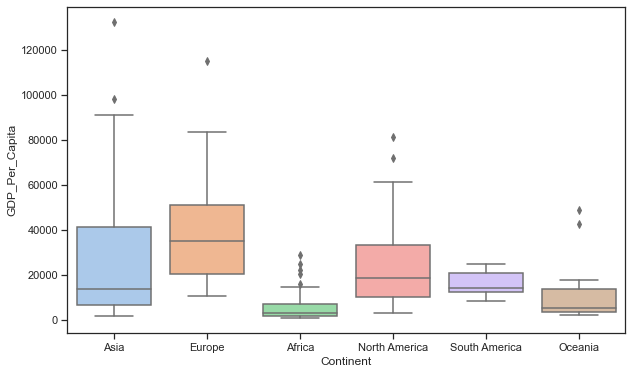

In [138]:
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Continent", y="GDP_Per_Capita", data=gdp_2018, ax=ax)


**21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correc this without modifying the original csv file.**

**22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.**

In [186]:
life_expectancy = pd.read_csv('../data/life_expectancy.csv', skiprows=4)

In [187]:
life_expectancy = life_expectancy.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)

In [188]:
life_expectancy.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,64.152000,64.537000,64.752000,65.132000,65.294000,65.502000,66.063000,66.439000,66.757000,...,75.601000,75.683000,75.617000,75.903000,76.072000,76.248000,75.723000,74.626000,NaN,NaN
1,Africa Eastern and Southern,44.085552,44.386697,44.752182,44.913159,45.479043,45.498338,45.249105,45.924905,46.223097,...,61.337917,61.856458,62.444050,62.922390,63.365863,63.755678,63.313860,62.454590,NaN,NaN
2,Afghanistan,32.535000,33.068000,33.547000,34.016000,34.494000,34.953000,35.453000,35.924000,36.418000,...,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000,62.575000,61.982000,NaN,NaN
3,Africa Western and Central,37.845152,38.164950,38.735102,39.063715,39.335360,39.618038,39.837827,39.471500,40.085679,...,55.922229,56.195872,56.581678,56.888446,57.189139,57.555796,57.226373,56.988657,NaN,NaN
4,Angola,38.211000,37.267000,37.539000,37.824000,38.131000,38.495000,38.757000,39.092000,39.484000,...,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000,62.261000,61.643000,NaN,NaN


In [189]:
yrs = list(life_expectancy.columns)[1:-1]

In [190]:
life_expectancy = pd.melt(life_expectancy, id_vars=["Country Name"], value_vars=yrs)

In [191]:
life_expectancy = life_expectancy.dropna()

In [206]:
# CChecking to see if dropna worked
life_expectancy[life_expectancy .isna().any(axis=1)]

,Country,Year,Life_Expectancy


In [199]:
life_expectancy = life_expectancy.rename(columns={"variable": "Year", "value":"Life_Expectancy", "Country Name":"Country"})

In [200]:
life_expectancy.head()

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152000
1,Africa Eastern and Southern,1960,44.085552
2,Afghanistan,1960,32.535000
3,Africa Western and Central,1960,37.845152
4,Angola,1960,38.211000


**23. What was the first country with a life expectancy to exceed 80?**

In [201]:
life_expectancy[life_expectancy["Life_Expectancy"]>=80].sort_values(by=["Year"])

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.126829
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16304,Faroe Islands,2021,83.497561
16307,United Kingdom,2021,80.700000
16315,Greece,2021,80.182927
16334,Isle of Man,2021,80.525000


**24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.**

In [202]:
# Make the dtypes match
life_expectancy['Country'] = life_expectancy['Country'].astype('string')
life_expectancy['Year'] = life_expectancy['Year'].astype('int64')

In [203]:
#Check that they match
print(life_expectancy.dtypes)
print(gdp_df.dtypes)

Country             string
Year                 int64
Life_Expectancy    float64
dtype: object
Country            object
Year                int64
GDP_Per_Capita    float64
Continent          object
dtype: object


In [204]:
gdp_le = pd.merge(gdp_df, life_expectancy, on=["Country", "Year"], how="inner")

In [209]:
gdp_le = gdp_le.dropna()

**25. Create a new DataFrame, named gdp_le_2019 by extracting data for the year 2019 from gdp_le. How many countries have a life expectancy of at least 80 in 2019?**

In [213]:
gdp_le_2019 = gdp_le[gdp_le["Year"]==2019]
gdp_le_2019.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
1,Afghanistan,2019,2065.036235,Asia,63.565
20,Albania,2019,13653.201570,Europe,79.282
51,Algeria,2019,11521.984210,Africa,76.474
82,Angola,2019,6712.021615,Africa,62.448
113,Antigua and Barbuda,2019,21850.133412,North America,78.691


**26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.**